In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df= pd.read_csv("CardioGoodFitness.csv")
df
df.shape

(180, 9)

In [3]:
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200
177,TM798,45,Male,16,Single,5,5,90886,160
178,TM798,47,Male,18,Partnered,4,5,104581,120


In [4]:
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [5]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Product,180,3,TM195,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,180.0,NaN,NaN,NaN,28.788889,6.943498,18.0,24.0,26.0,33.0,50.0
Gender,180,2,Male,104,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,180.0,NaN,NaN,NaN,15.572222,1.617055,12.0,14.0,16.0,16.0,21.0
MaritalStatus,180,2,Partnered,107,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Usage,180.0,NaN,NaN,NaN,3.455556,1.084797,2.0,3.0,3.0,4.0,7.0
Fitness,180.0,NaN,NaN,NaN,3.311111,0.958869,1.0,3.0,3.0,4.0,5.0
Income,180.0,NaN,NaN,NaN,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.0,104581.0
Miles,180.0,NaN,NaN,NaN,103.194444,51.863605,21.0,66.0,94.0,114.75,360.0


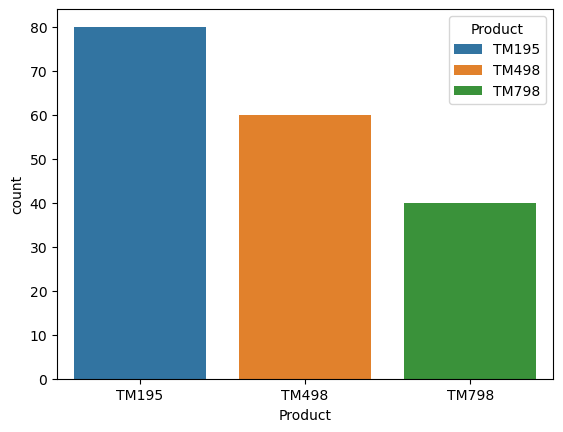

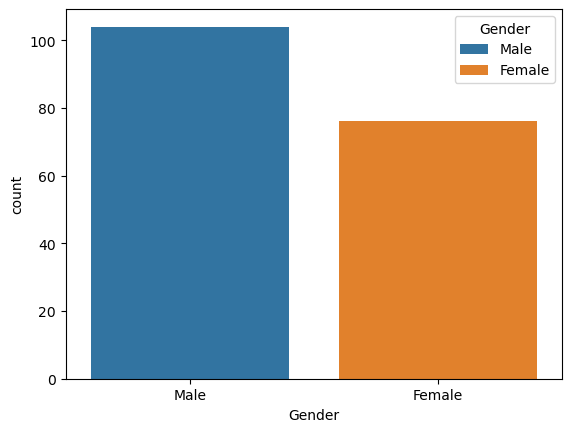

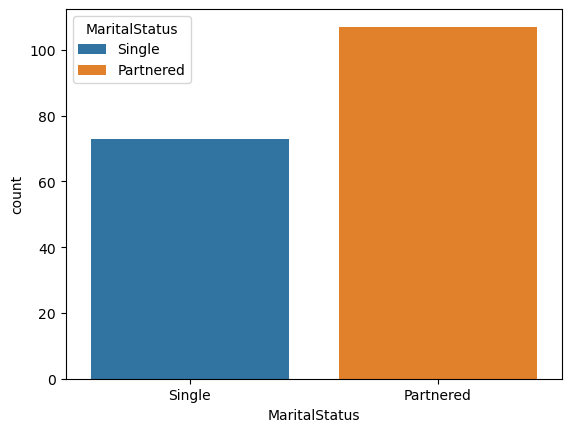

In [6]:
for i in df.select_dtypes(include=["object","bool"]):
    plt.figure()
    sns.countplot(df[i],hue=df[i], dodge=False)
    plt.show()

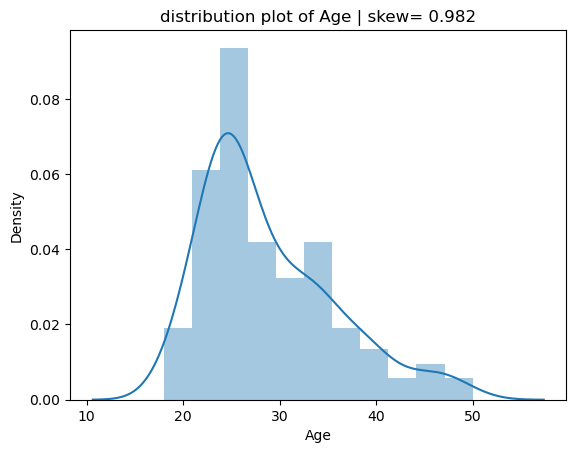

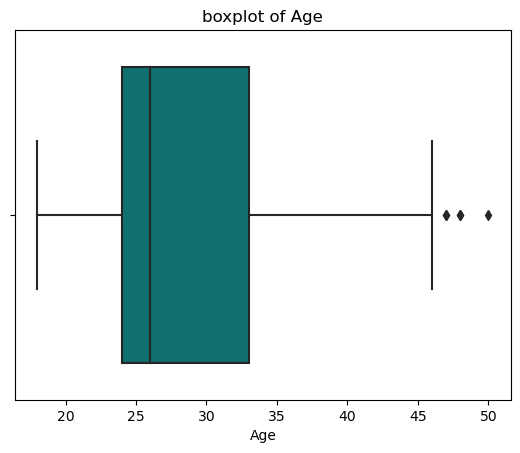

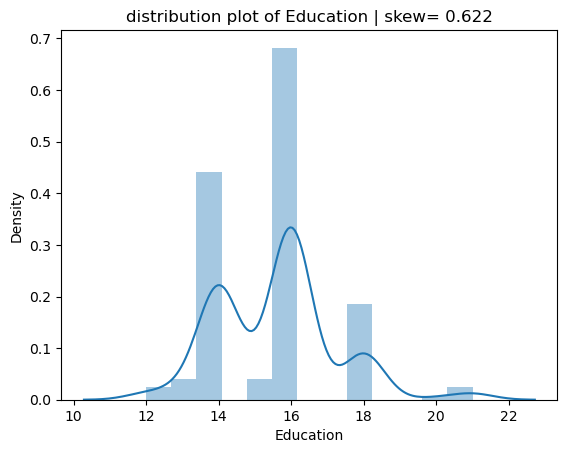

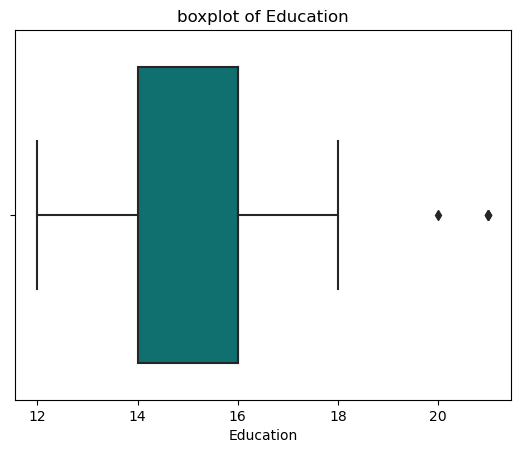

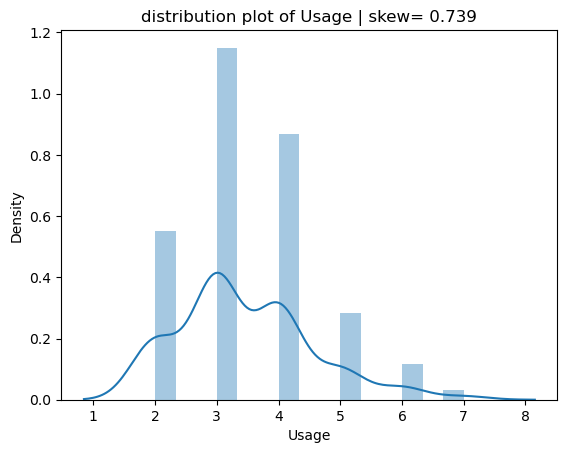

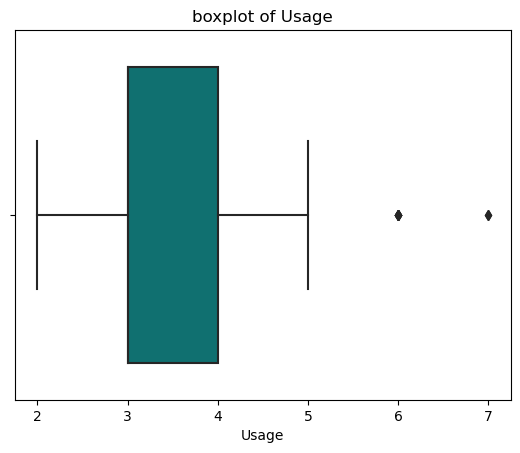

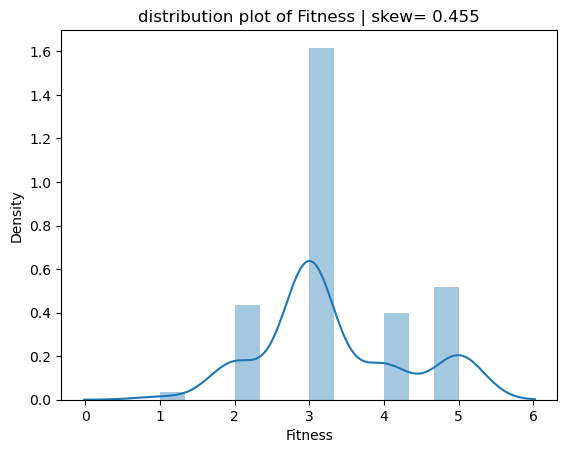

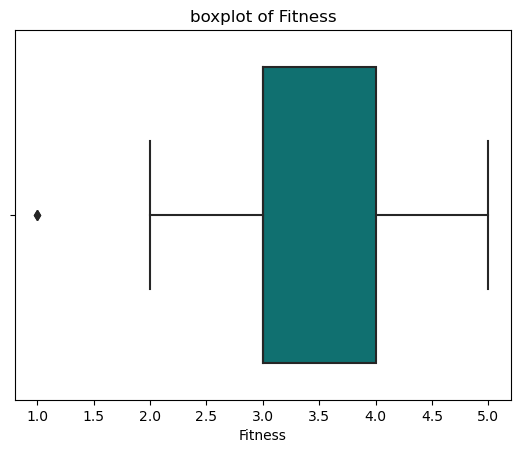

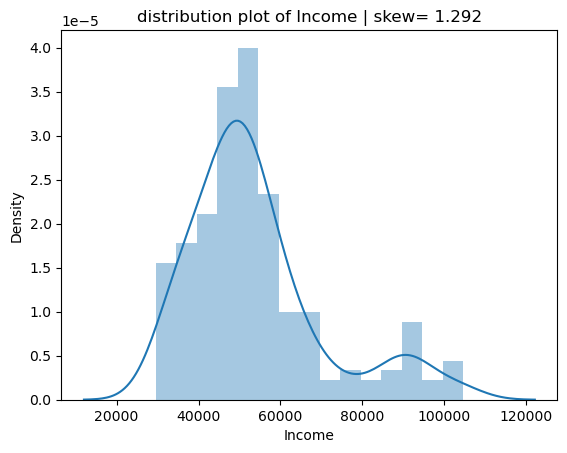

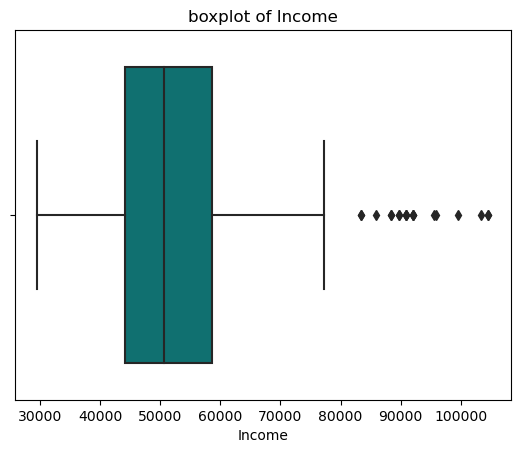

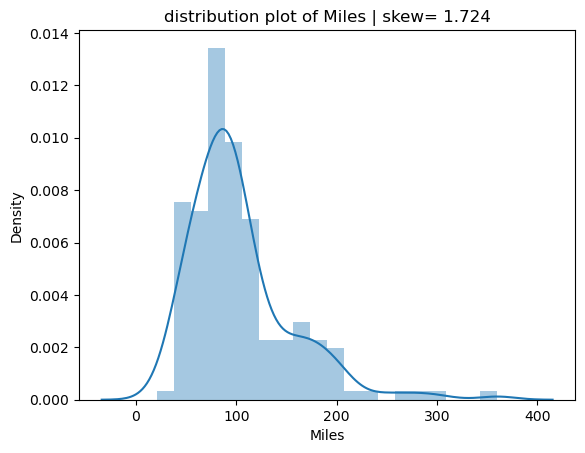

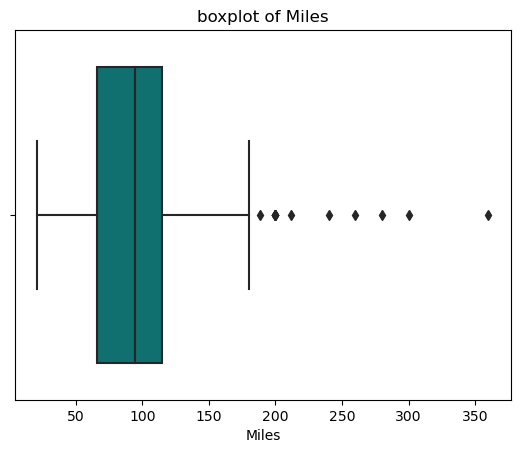

In [7]:
for i in df.select_dtypes(include=["integer", "float"]):
    plt.figure()
    skewness=round(df[i].skew(),3)
    sns.distplot(df[i])
    plt.title(f"distribution plot of {i} | skew= {skewness}")
    plt.figure()
    sns.boxplot(df[i], color="teal")
    plt.title(f"boxplot of {i}")
    plt.show()

<Figure size 640x480 with 0 Axes>

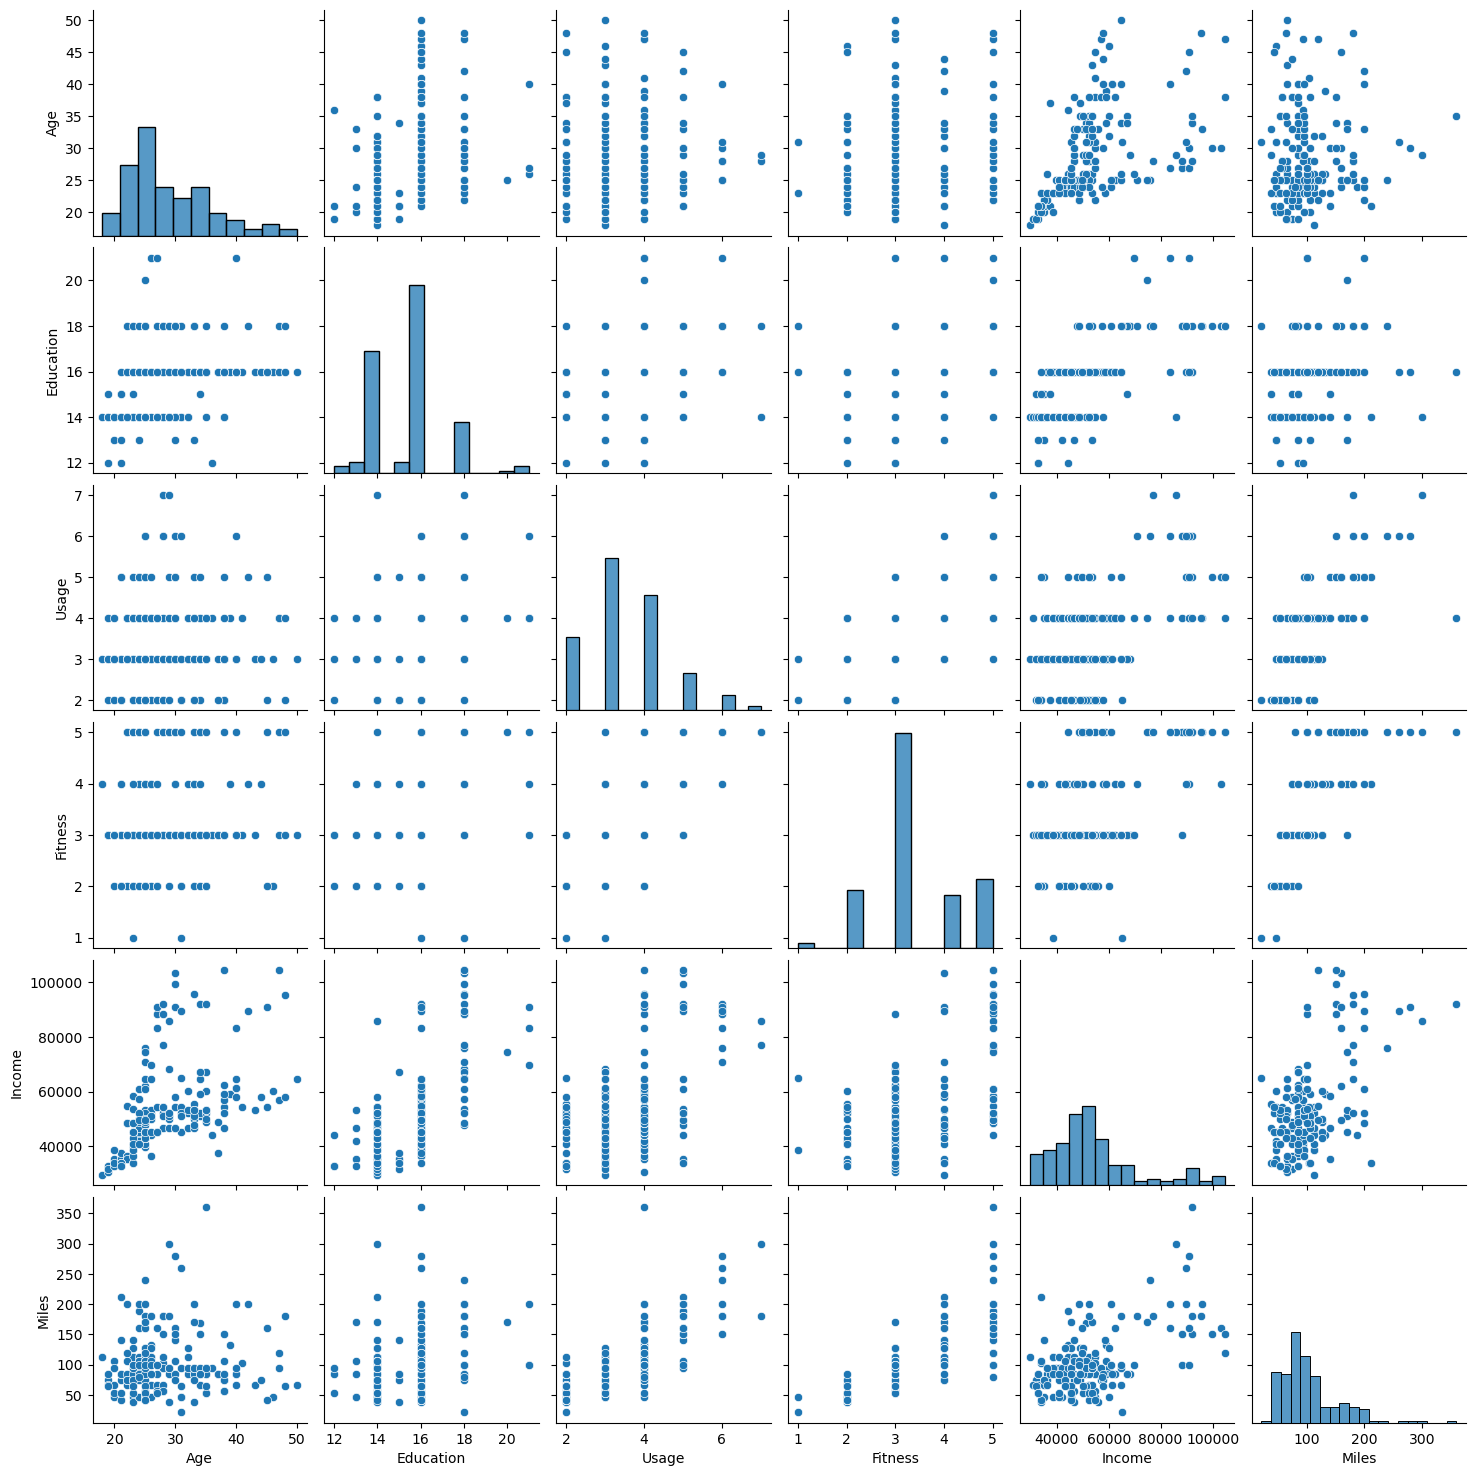

In [8]:
plt.figure()
sns.pairplot(data=df)
plt.show()

<Figure size 640x480 with 0 Axes>

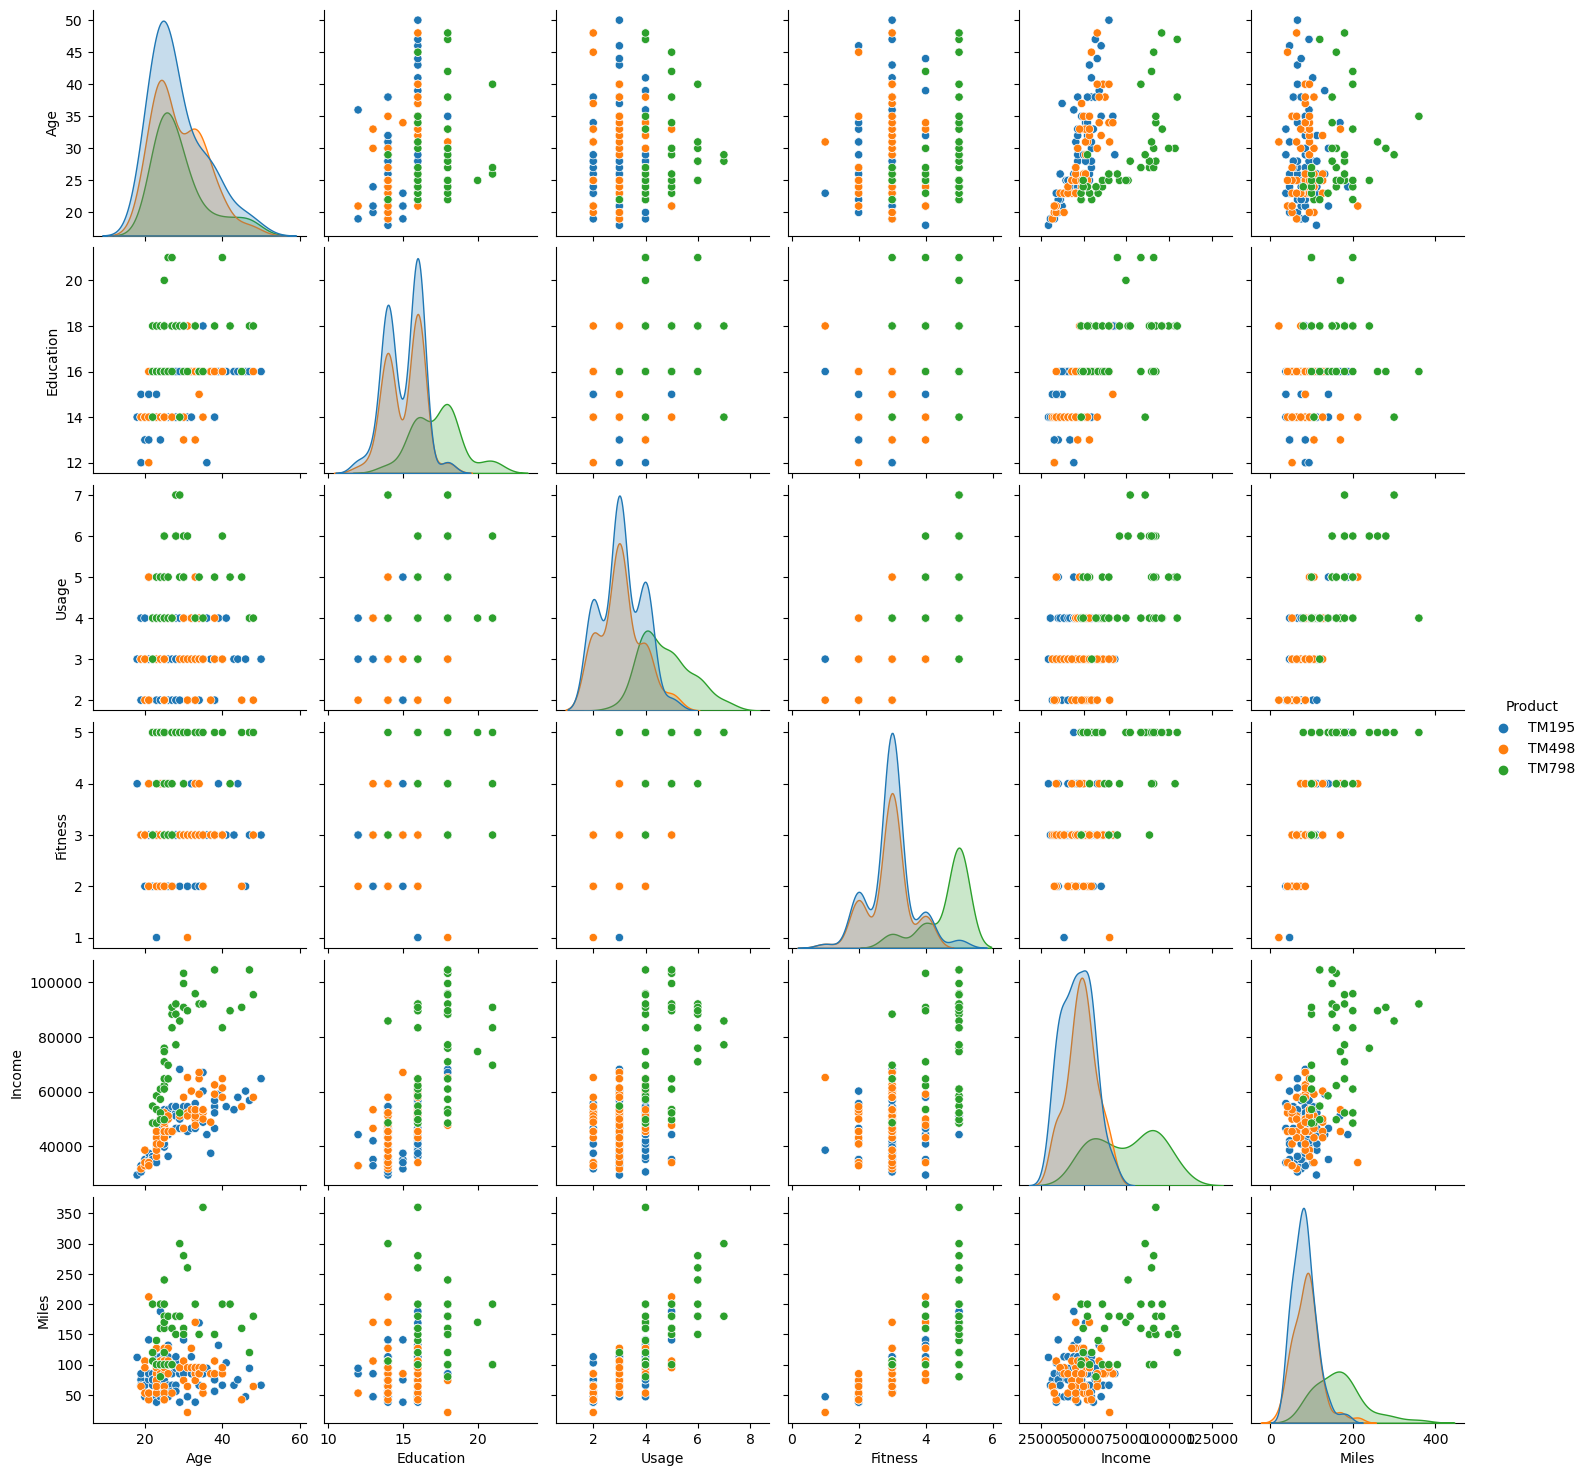

<Figure size 640x480 with 0 Axes>

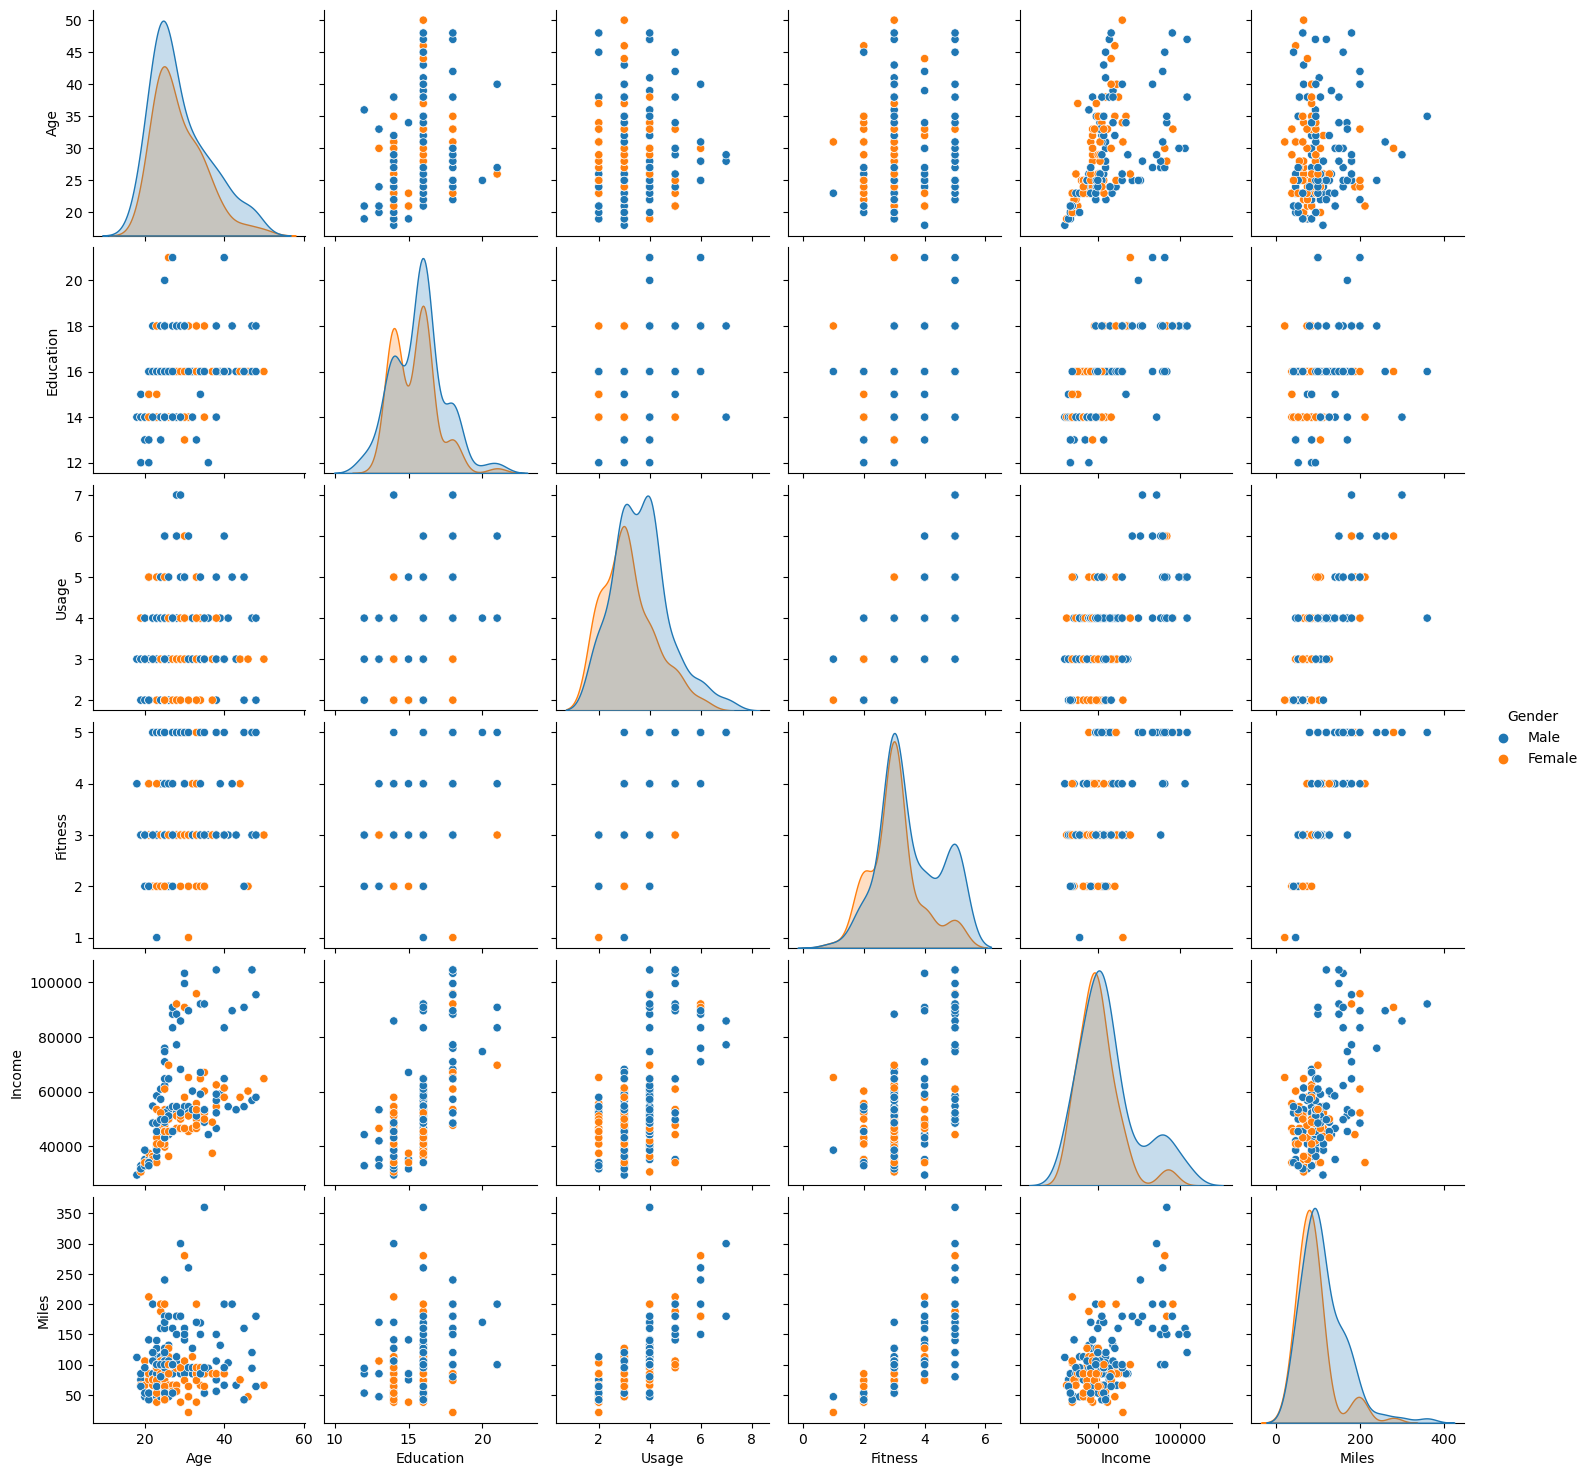

<Figure size 640x480 with 0 Axes>

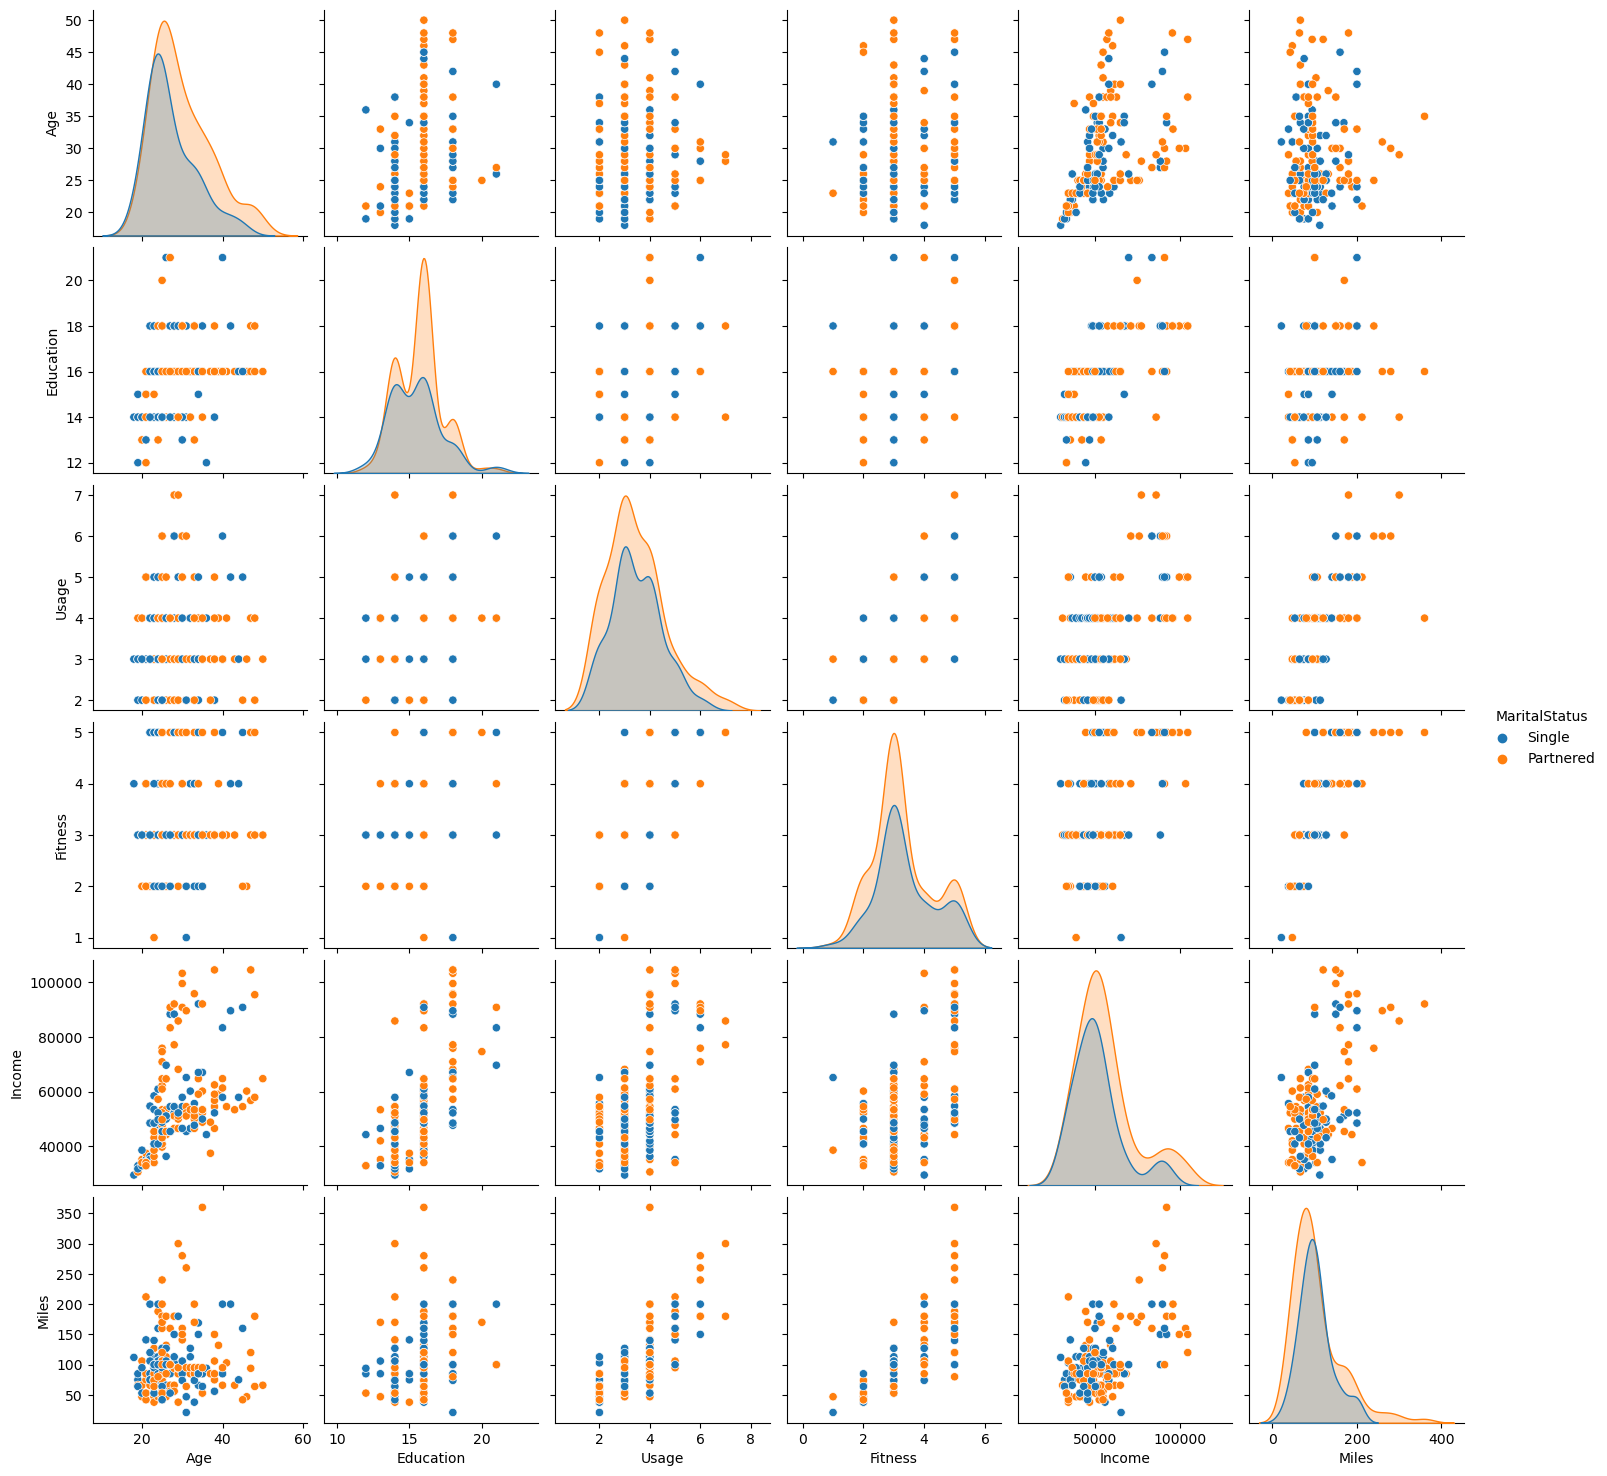

In [9]:
for i in df.select_dtypes(include=["bool","object"]):
    plt.figure()
    sns.pairplot(data=df, hue=i)
    plt.show()

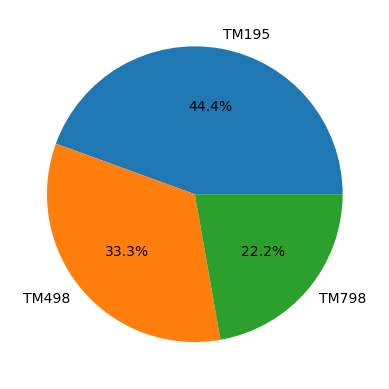

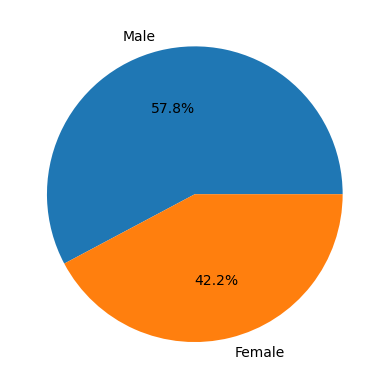

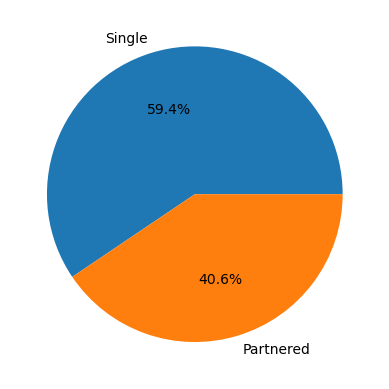

In [10]:
for i in df.select_dtypes(include=["bool","object"]):
    plt.figure()
    plt.pie(df[i].value_counts(), labels=df[i].unique(),autopct="%1.1f%%")

In [11]:
from scipy.stats import f_oneway

for i in df.select_dtypes(include=["float","integer"]):
    group1=df[df["Gender"]=="Male"][i]
    group2= df[df["Gender"]=="Female"][i]
    ANOVA= f_oneway(group1, group2)
    notes= f"no mean difference for {i}" + i if ANOVA.pvalue<0.05 else "mean difference exists"
    print(f"{i}")
    print(f"Statistic Value: {ANOVA.statistic: .3f}")
    print(f"P-Value: {ANOVA.pvalue: .3f}")
    print(f"{notes}")

Age
Statistic Value:  0.135
P-Value:  0.714
mean difference exists
Education
Statistic Value:  1.590
P-Value:  0.209
mean difference exists
Usage
Statistic Value:  8.578
P-Value:  0.004
no mean difference for UsageUsage
Fitness
Statistic Value:  12.339
P-Value:  0.001
no mean difference for FitnessFitness
Income
Statistic Value:  7.576
P-Value:  0.007
no mean difference for IncomeIncome
Miles
Statistic Value:  8.870
P-Value:  0.003
no mean difference for MilesMiles


In [12]:
from scipy.stats import f_oneway

for i in df.select_dtypes(include=["float","integer"]):
    group1=df[df["Gender"]=="Male"][i]
    group2= df[df["Gender"]=="Female"][i]
    ANOVA= f_oneway(group1, group2)
    print(f"{i}")
    print(f"Statistic Value: {ANOVA.statistic: .3f}")
    print(f"P-Value: {ANOVA.pvalue: .3f}")
    if ANOVA.pvalue<=0.05:
        print(f" mean diferences for {i} exists")
    else:
        print(f"no mean differences for {i}")

Age
Statistic Value:  0.135
P-Value:  0.714
no mean differences for Age
Education
Statistic Value:  1.590
P-Value:  0.209
no mean differences for Education
Usage
Statistic Value:  8.578
P-Value:  0.004
 mean diferences for Usage exists
Fitness
Statistic Value:  12.339
P-Value:  0.001
 mean diferences for Fitness exists
Income
Statistic Value:  7.576
P-Value:  0.007
 mean diferences for Income exists
Miles
Statistic Value:  8.870
P-Value:  0.003
 mean diferences for Miles exists


In [13]:
from scipy.stats import f_oneway

for i in df.select_dtypes(include=["float","integer"]):
    group1=df[df["Gender"]=="Male"][i]
    group2= df[df["Gender"]=="Female"][i]
    ANOVA= f_oneway(group1, group2)
    if ANOVA.pvalue<=0.05:
        notes= f" mean diferences for {i} exists"
    else:
        notes= f"no mean differences for {i}"
    print(f"{i}")
    print(f"Statistic Value: {ANOVA.statistic: .3f}")
    print(f"P-Value: {ANOVA.pvalue: .3f}")
    print(f"{notes}")

Age
Statistic Value:  0.135
P-Value:  0.714
no mean differences for Age
Education
Statistic Value:  1.590
P-Value:  0.209
no mean differences for Education
Usage
Statistic Value:  8.578
P-Value:  0.004
 mean diferences for Usage exists
Fitness
Statistic Value:  12.339
P-Value:  0.001
 mean diferences for Fitness exists
Income
Statistic Value:  7.576
P-Value:  0.007
 mean diferences for Income exists
Miles
Statistic Value:  8.870
P-Value:  0.003
 mean diferences for Miles exists


In [14]:
from scipy.stats import shapiro

for i in df.select_dtypes(include=["integer","float"]):
    normality=shapiro(df[i])
    if normality.pvalue<=0.05:
        conclusion=f"the {i} column is not normally distributed"
    else:
        conclusion=f"the {i} column normally distributed"
    print(f"{i}")
    print(f"W score: {normality.statistic: .3f}")
    print(f"p-value: {normality.pvalue: .3f}")
    print(f"{conclusion}")

Age
W score:  0.916
p-value:  0.000
the Age column is not normally distributed
Education
W score:  0.866
p-value:  0.000
the Education column is not normally distributed
Usage
W score:  0.887
p-value:  0.000
the Usage column is not normally distributed
Fitness
W score:  0.835
p-value:  0.000
the Fitness column is not normally distributed
Income
W score:  0.877
p-value:  0.000
the Income column is not normally distributed
Miles
W score:  0.861
p-value:  0.000
the Miles column is not normally distributed


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


<AxesSubplot:xlabel='Age', ylabel='Income'>

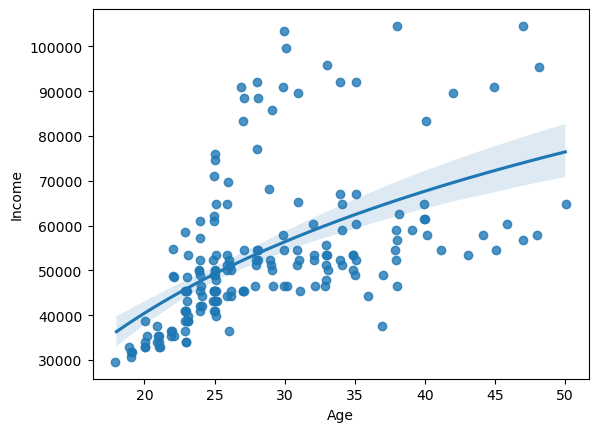

In [24]:
plt.figure()
sns.regplot(x="Age",y="Income",data=df, order=1, logx=True, x_jitter=0.15)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


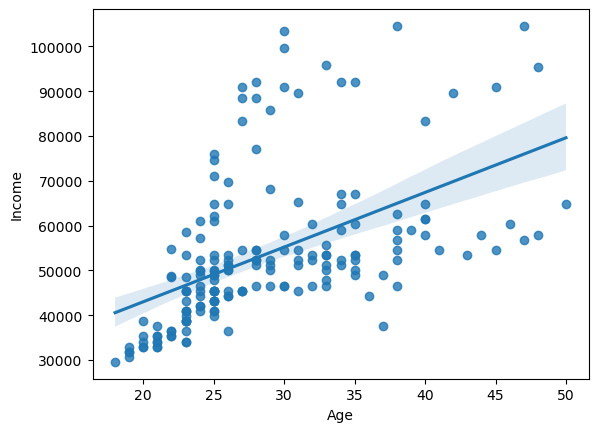

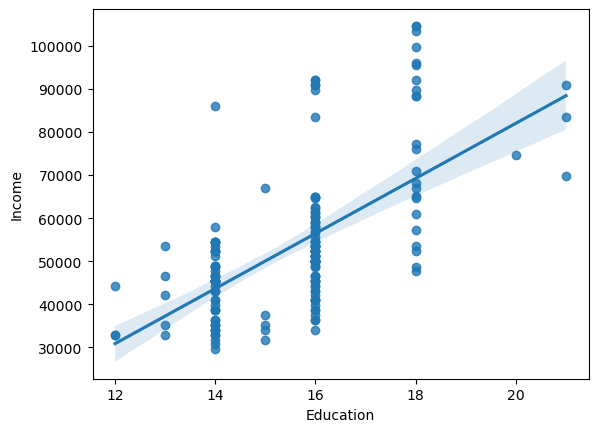

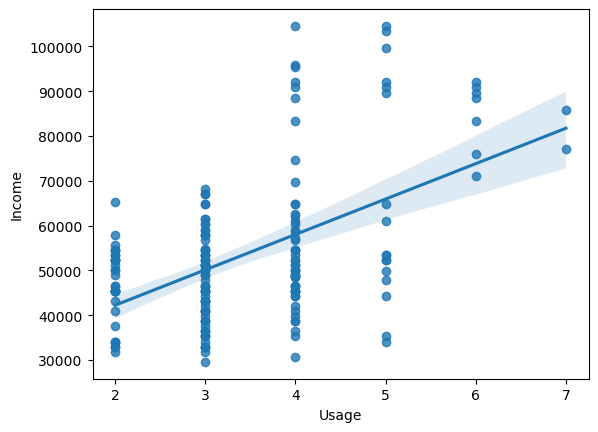

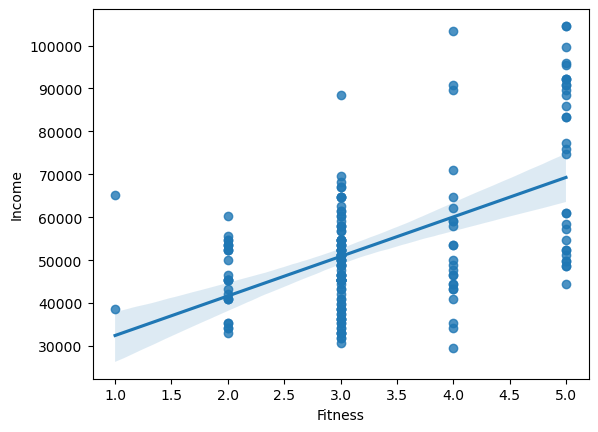

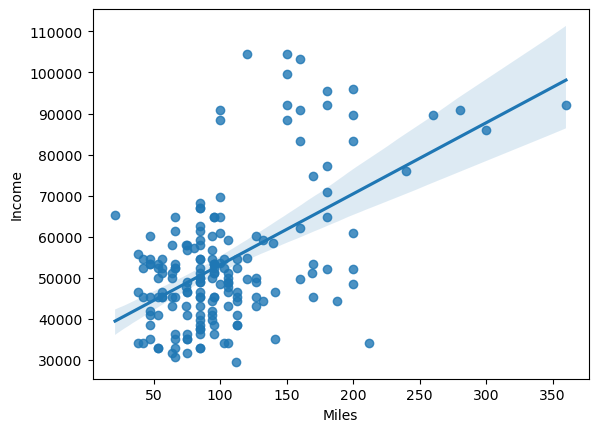

In [32]:
for i in df.select_dtypes(include=["integer","float"]).drop("Income",axis=1):
    plt.figure()
    sns.regplot(x=i,y="Income",data=df)
    plt.show()